In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
import sys
import json
from numpy import linalg as LA

import tensorflow as tf

import getpass
ui = getpass.getuser()
if ui == 'laura':
    p = '/home/laura'
elif ui == 'lauradriscoll':
    p = '/Users/lauradriscoll/Documents'

net = 'stepnet'
PATH_YANGNET = os.path.join(p,'code/multitask-nets',net) 

sys.path.insert(0, PATH_YANGNET)

from task import generate_trials, rule_name, rule_index_map, rules_dict
from network import Model
from tools_lnd import name_best_ckpt, gen_trials_from_model_dir, get_stim_cats, take_names
from task import generate_trials, rule_name
import tools

In [39]:
def plot_training(m):
    rule_trains = rules_dict['all']
    fig = plt.figure(figsize=(20, 10))
    cmap=plt.get_cmap('Greys')
    fname = os.path.join(m, 'log.json')

    with open(fname, 'r') as f:
        log_all = json.load(f)
    for ri in range(len(rule_trains)):
        r = rule_trains[ri]
        c = cmap((ri+1)/(len(rule_trains)+1))
        
        ax = fig.add_subplot(1,2,1)
        x = np.log(log_all['cost_'+r])
        plt.plot(x,'-',c = c)
        ax.set_xlabel('Training Step (x 1000)')
        ax.set_ylabel('Log Cost [for each task]')
        plt.ylim([-6,2])
        
        ax = fig.add_subplot(1,2,2)
        x = log_all['perf_'+r]
        plt.plot(x,'-',c = c)
        ax.set_xlabel('Training Step (x 1000)')
        ax.set_ylabel('Performance [for each task]')
#         plt.ylim([-6,2])

    plt.title(m)
    plt.show()    

In [50]:
with tf.Session() as sess:
    model.restore()
    model._sigma=0
    var_list = model.var_list
    params = [sess.run(var) for var in var_list]
    hparams = model.hp
    for rule in rule_trains:
        trial[rule] = generate_trials(rule, hparams, mode=mode, 
                                      noise_on=noise_on, batch_size = 500, delay_fac =1)

INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final1/all/LeakyRNN/softplus/diag/15_tasks/128_n_rnn/lr6.0l2_w6.0_h6.0_sig_rec0.05_sig_x0.1_w_rec_coeff0.8_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/2/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final1/all/LeakyRNN/softplus/diag/15_tasks/128_n_rnn/lr6.0l2_w6.0_h6.0_sig_rec0.05_sig_x0.1_w_rec_coeff0.8_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/2/model.ckpt


In [53]:
hparams


{u'activation': u'softplus',
 u'alpha': 0.2,
 u'batch_size_test': 8192,
 u'batch_size_train': 64,
 u'c_intsyn': 0,
 u'dt': 20,
 u'in_type': u'normal',
 u'ksi_intsyn': 0,
 u'l1_h': 0.0,
 u'l1_weight': 0.0,
 u'l2_h': 1e-06,
 u'l2_weight': 1e-06,
 u'l2_weight_init': 0,
 u'learning_rate': 0.001,
 u'loss_type': u'lsq',
 u'n_eachring': 2,
 u'n_input': 20,
 u'n_output': 3,
 u'n_rep': 256,
 u'n_rnn': 128,
 u'n_rule': 15,
 u'num_ring': 2,
 u'optimizer': u'adam',
 u'out_type': u'all',
 u'p_weight_train': None,
 'rng': <mtrand.RandomState at 0x7ff410148a50>,
 u'rnn_type': u'LeakyRNN',
 u'rule_probs': [0.06666666666666667,
  0.06666666666666667,
  0.06666666666666667,
  0.06666666666666667,
  0.06666666666666667,
  0.06666666666666667,
  0.06666666666666667,
  0.06666666666666667,
  0.06666666666666667,
  0.06666666666666667,
  0.06666666666666667,
  0.06666666666666667,
  0.06666666666666667,
  0.06666666666666667,
  0.06666666666666667],
 u'rule_start': 5,
 u'rule_trains': [u'fdgo',
  u'reactgo'

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(148, 128) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(128,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(128, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>


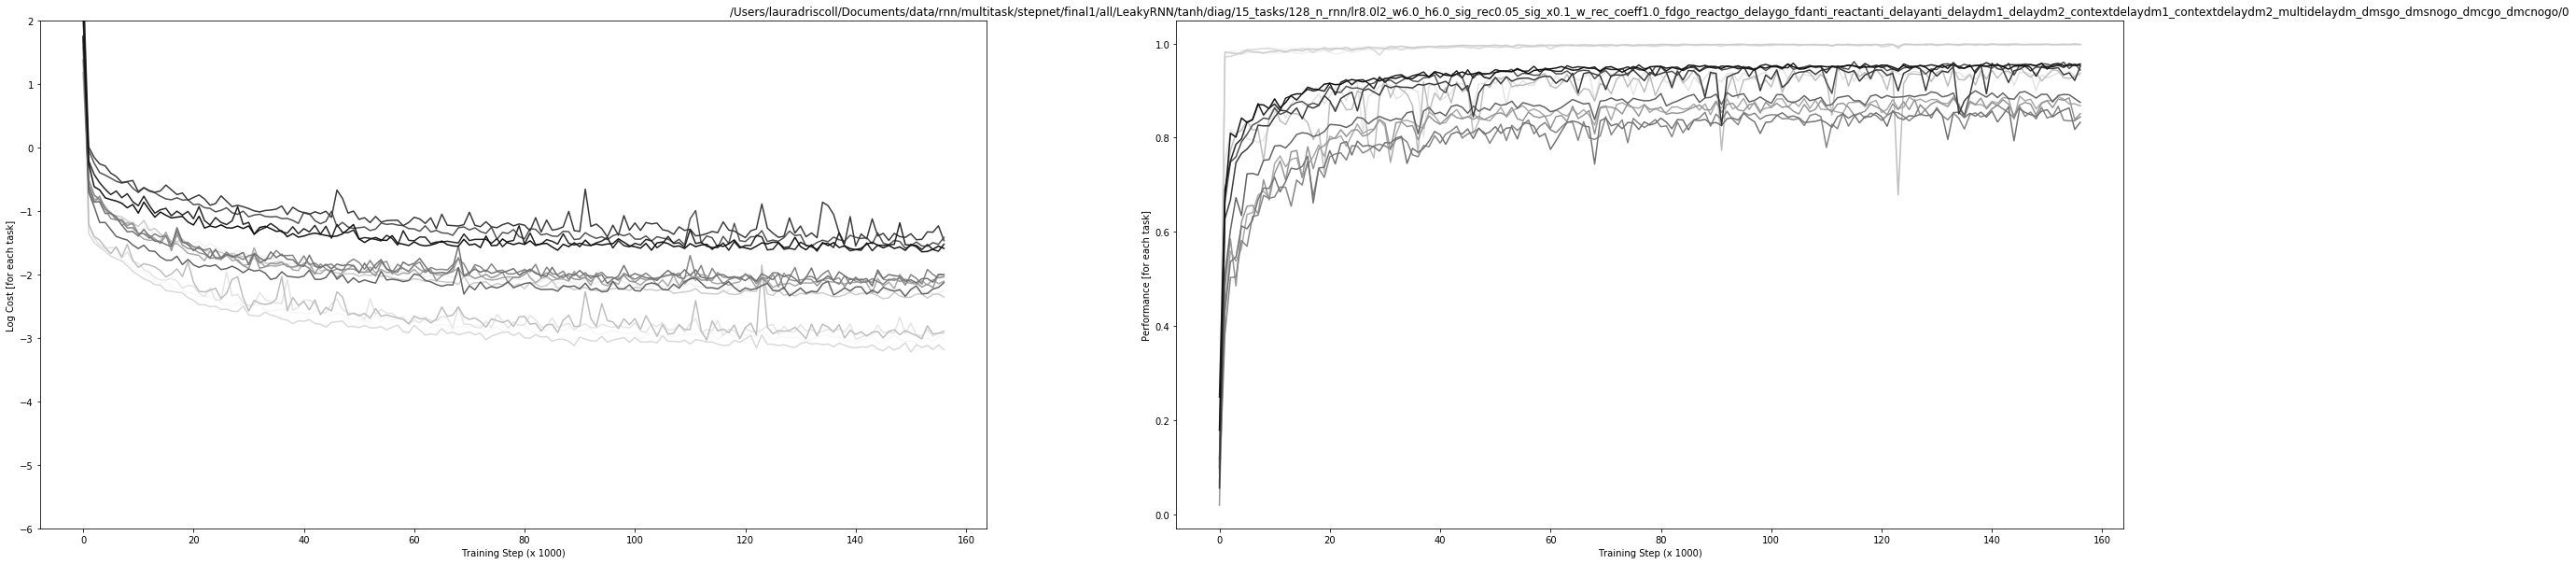

INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final1/all/LeakyRNN/tanh/diag/15_tasks/128_n_rnn/lr8.0l2_w6.0_h6.0_sig_rec0.05_sig_x0.1_w_rec_coeff1.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final1/all/LeakyRNN/tanh/diag/15_tasks/128_n_rnn/lr8.0l2_w6.0_h6.0_sig_rec0.05_sig_x0.1_w_rec_coeff1.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/0/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(148, 128) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(128,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(128, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>


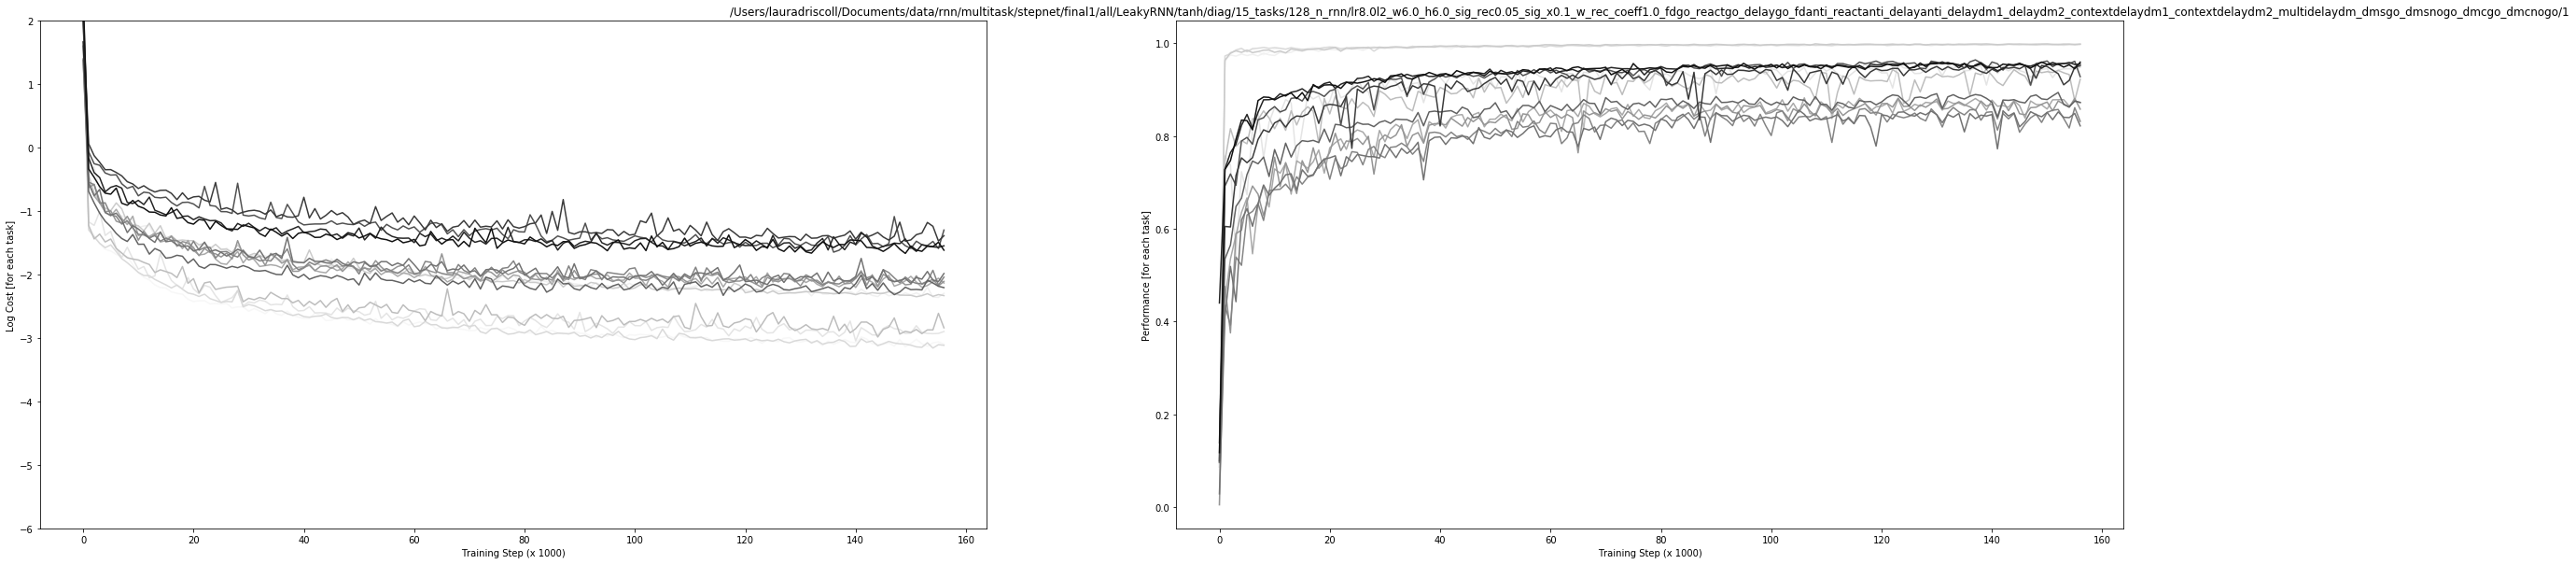

INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final1/all/LeakyRNN/tanh/diag/15_tasks/128_n_rnn/lr8.0l2_w6.0_h6.0_sig_rec0.05_sig_x0.1_w_rec_coeff1.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/1/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final1/all/LeakyRNN/tanh/diag/15_tasks/128_n_rnn/lr8.0l2_w6.0_h6.0_sig_rec0.05_sig_x0.1_w_rec_coeff1.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/1/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(148, 128) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(128,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(128, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>


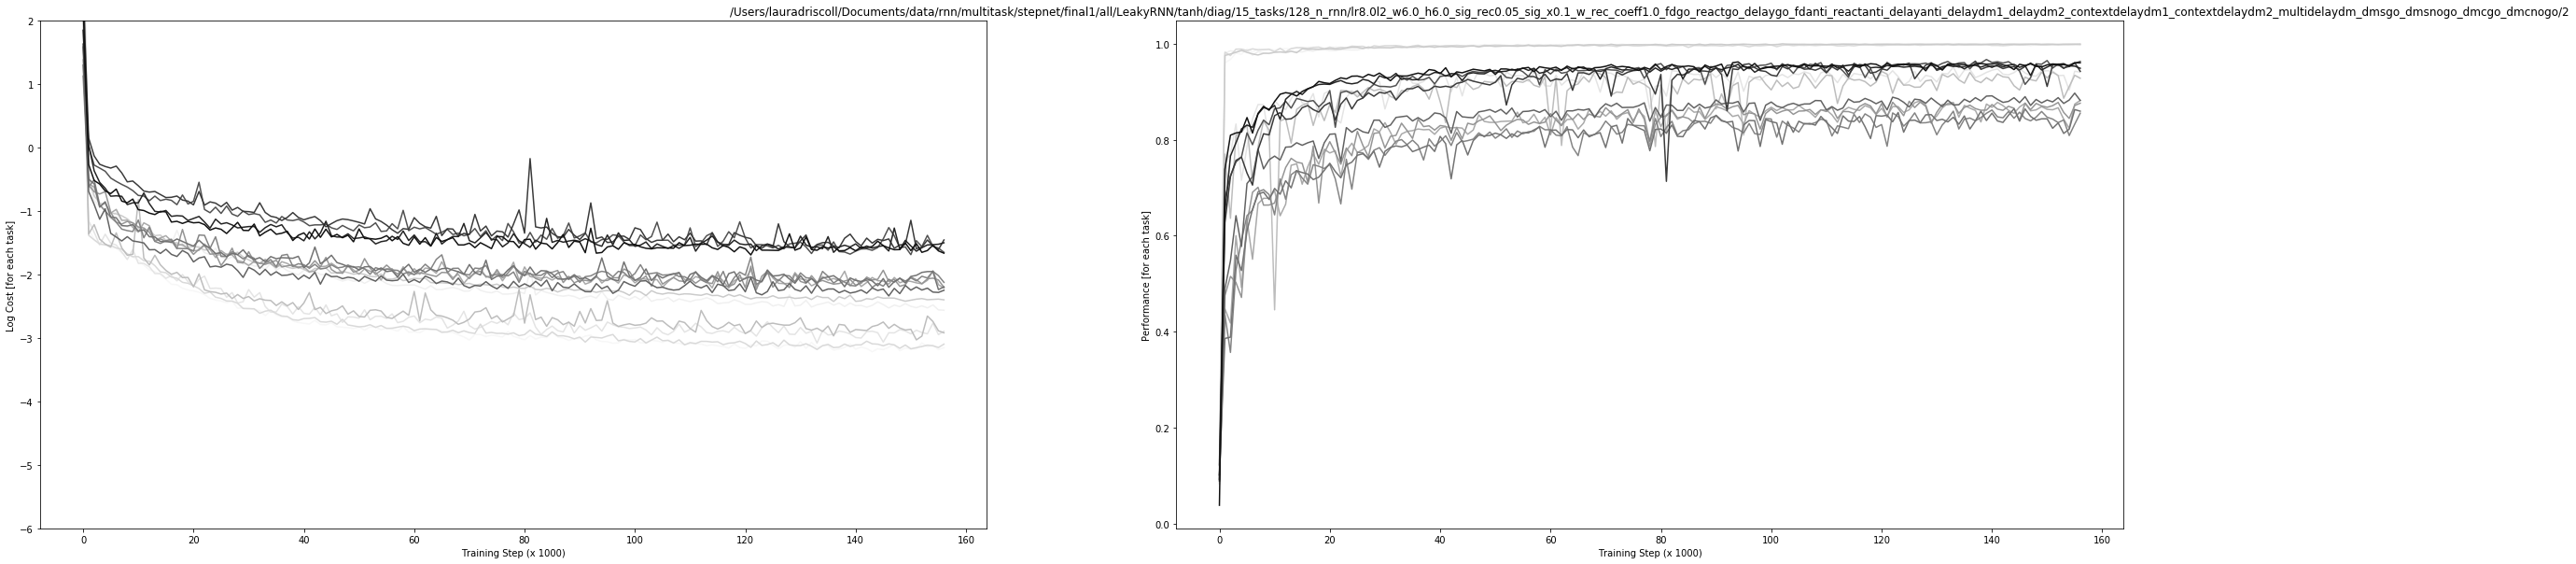

INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final1/all/LeakyRNN/tanh/diag/15_tasks/128_n_rnn/lr8.0l2_w6.0_h6.0_sig_rec0.05_sig_x0.1_w_rec_coeff1.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/2/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final1/all/LeakyRNN/tanh/diag/15_tasks/128_n_rnn/lr8.0l2_w6.0_h6.0_sig_rec0.05_sig_x0.1_w_rec_coeff1.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/2/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(148, 128) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(128,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(128, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>


In [94]:
###save and load epoch divisions
#get trial in multitask env tensorflow

rule_trains = ['fdgo', 'reactgo', 'delaygo', 'fdanti', 'reactanti', 'delayanti',
              'delaydm1', 'delaydm2', 'contextdelaydm1', 'contextdelaydm2', 'multidelaydm',
              'dmsgo', 'dmsnogo', 'dmcgo', 'dmcnogo']

trial = {}
h = {}
state = {}
trial_ouput = {}
trial_input = {}

all_folder = '/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final1/all/LeakyRNN'

act_fxn = 'tanh' #'softplus' #

if act_fxn=='tanh':
    m_file ='diag/15_tasks/128_n_rnn/lr8.0l2_w6.0_h6.0_sig_rec0.05_sig_x0.1_w_rec_coeff1.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo'
else:
    m_file = 'diag/15_tasks/128_n_rnn/lr6.0l2_w6.0_h6.0_sig_rec0.05_sig_x0.1_w_rec_coeff0.8_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo'

for seed in [str(0),str(1),str(2)]:
    
    m = os.path.join(all_folder,act_fxn,m_file,seed)

    for mode in ['test','random']:
        
        model = Model(m)
        
        if mode == 'random':
            noise_on=True
        else:
            noise_on=False
            plot_training(m)
            
        with tf.Session() as sess:
            model.restore()
            model._sigma=0
            var_list = model.var_list
            params = [sess.run(var) for var in var_list]
            hparams = model.hp
            for rule in rule_trains:
                trial[rule] = generate_trials(rule, hparams, mode=mode, 
                                              noise_on=noise_on, batch_size = 500, delay_fac =1)

            # Generating feed_dict.
                feed_dict = tools.gen_feed_dict(model, trial[rule], hparams)
                h[rule] = sess.run(model.h, feed_dict=feed_dict)

                trial_ouput[rule] = trial[rule].y
                trial_input[rule] = trial[rule].x
                state[rule] = h[rule]
                
                rule_trains = rules_dict['all']

                

        save_dir = os.path.join('/Users/lauradriscoll/Documents/','share_mats',act_fxn,seed,mode)
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)

        np.savez(os.path.join(save_dir,'state.npz'),**state)
        np.savez(os.path.join(save_dir,'trial_input.npz'),**trial_input)
        np.savez(os.path.join(save_dir,'trial_output.npz'),**trial_ouput)
        np.savez(os.path.join(save_dir,'model_hparams.npz'),**hparams)
        np.savez(os.path.join(save_dir,'model_params.npz'),params)

In [97]:
trial_output = np.load(os.path.join(save_dir,'trial_output.npz'))

In [98]:
target_input = np.load(os.path.join(save_dir,'trial_input.npz'))

In [99]:
state = np.load(os.path.join(save_dir,'state.npz'))

In [100]:
hparams = np.load(os.path.join(save_dir,'model_params.npz'))

In [101]:
hparams

In [103]:
np.shape(trial_output['fdgo'])

(64, 500, 3)